In [1]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import teamgamelog, leaguedashteamstats
import pandas as pd 
import numpy as np



In [2]:
players = pd.DataFrame(pd.read_csv("players.csv"))

def find_player_id(player_full_name):
    for i in range(len(players)):
        player = players.iloc[i]
        if player["full_name"] == player_full_name:
            return player['id']

def get_players_for_season(season_start):
    file_location = "../player_season/player_season_data/season_year_start_player_data_" + str(season_start)
    season = pd.read_csv(file_location)
    players_id = season['PLAYER_ID'].drop_duplicates()
    return players_id

def get_player_netrating_for_season(player_id, season_start):
    file_location = "../player_season/player_season_data/season_year_start_player_data_" + str(season_start)
    season = pd.read_csv(file_location)
    player_netrating = season[season['PLAYER_ID'] == player_id]['NET_RATING'].mean()
    return player_netrating

def get_team_wins_for_season(team_id, season_start):
    file_location = "../team_season/team_season_data/season_year_start_team_data_" + str(season_start)
    season = pd.read_csv(file_location)
    team_wins = season[season['TEAM_ID'] == team_id]['WINS'].sum()
    return team_wins

def get_player_netrating_and_team_wins(player_full_name, season_start):
    player_id = find_player_id(player_full_name)
    player_netrating = get_player_netrating_for_season(player_id, season_start)
    
    team_id = season[season['PLAYER_ID'] == player_id]['TEAM_ID'].iloc[0]
    team_wins = get_team_wins_for_season(team_id, season_start)
    
    return player_netrating, team_wins

def get_all_player_netratings_and_team_wins(season_start):
    players_id = get_players_for_season(season_start)
    netrating_list = []
    team_wins_list = []
    
    for player_id in players_id:
        player_netrating = get_player_netrating_for_season(player_id, season_start)
        team_id = season[season['PLAYER_ID'] == player_id]['TEAM_ID'].iloc[0]
        team_wins = get_team_wins_for_season(team_id, season_start)
        
        netrating_list.append(player_netrating)
        team_wins_list.append(team_wins)
    
    return netrating_list, team_wins_list

Matplotlib is building the font cache; this may take a moment.


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Vasav\\OneDrive\\Documents\\GitHub\\SIS\\player_season\\data_plots\\player_team_netrating_wins_scatterplot.png'

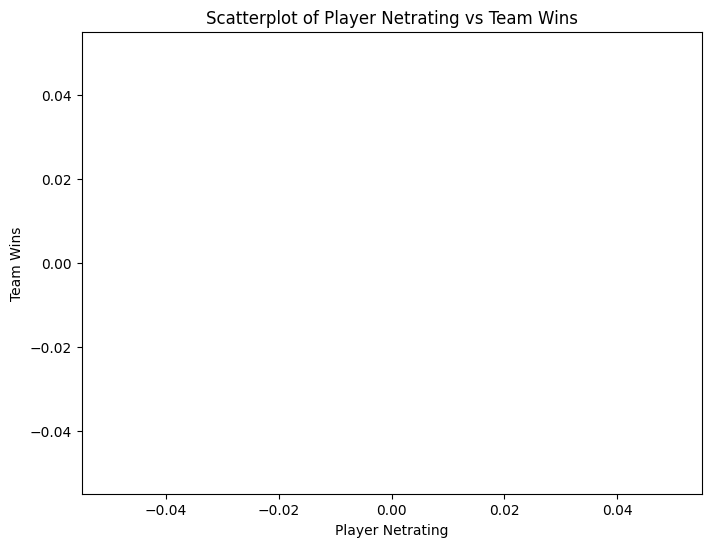

In [3]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

netrating_list = []  
team_wins_list = []   

data = {'Netrating': netrating_list, 'Team Wins': team_wins_list}
player_team_data = pd.DataFrame(data)

plt.figure(figsize=(8, 6)) 
sns.scatterplot(x='Netrating', y='Team Wins', data=player_team_data)

sns.regplot(x='Netrating', y='Team Wins', data=player_team_data, scatter=False, color='blue')

plt.title("Scatterplot of Player Netrating vs Team Wins")
plt.xlabel("Player Netrating")
plt.ylabel("Team Wins")

plt.savefig('./data_plots/player_team_netrating_wins_scatterplot.png')

plt.show()